#Survival Analysis

KM survival analyses for all types of breast
cancer.

In [4]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.impute import SimpleImputer
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from scipy import stats


In [5]:
#loading data
Data=pd.read_csv("/content/METABRIC_RNA_Mutation.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
Data

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Data.shape

(1904, 693)

In [8]:
print(Data.columns)

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)


In [9]:
Data = Data.loc[:, Data.columns[:31]]
Data.tail() #checking out clinical features

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,5.05,ILC,196.866667,1,Positive,1,ER+/HER2- Low Prolif,25.0,NaN,Living
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,5.04,IDC,44.733333,0,Negative,1,NaN,20.0,NaN,Died of Disease
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,6.05,IDC,175.966667,0,Positive,1,NaN,25.0,NaN,Died of Disease
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,5.05,IDC,86.233333,0,Positive,0,ER+/HER2- High Prolif,25.0,NaN,Died of Other Causes
1903,7299,60.02,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,5.04,IDC,201.900000,0,Negative,1,ER+/HER2- High Prolif,20.0,NaN,Died of Other Causes


In [10]:
data=Data[['patient_id','cancer_type_detailed','overall_survival_months','overall_survival']]

In [11]:
data

,patient_id,cancer_type_detailed,overall_survival_months,overall_survival
0,0,Breast Invasive Ductal Carcinoma,140.500000,1
1,2,Breast Invasive Ductal Carcinoma,84.633333,1
2,5,Breast Invasive Ductal Carcinoma,163.700000,0
3,6,Breast Mixed Ductal and Lobular Carcinoma,164.933333,1
4,8,Breast Mixed Ductal and Lobular Carcinoma,41.366667,0
...,...,...,...,...
1899,7295,Breast Invasive Lobular Carcinoma,196.866667,1
1900,7296,Breast Invasive Ductal Carcinoma,44.733333,0
1901,7297,Breast Invasive Ductal Carcinoma,175.966667,0
1902,7298,Breast Invasive Ductal Carcinoma,86.233333,0


Selecting different subtypes of breast cancer

In [12]:
data.cancer_type_detailed.unique()

array(['Breast Invasive Ductal Carcinoma',
       'Breast Mixed Ductal and Lobular Carcinoma',
       'Breast Invasive Lobular Carcinoma',
       'Breast Invasive Mixed Mucinous Carcinoma', 'Breast', nan,
       'Metaplastic Breast Cancer'], dtype=object)

In [13]:
Breast_Invasive_Ductal_Carcinoma=data[data["cancer_type_detailed"] == 'Breast Invasive Ductal Carcinoma']

In [14]:
Breast_Invasive_Ductal_Carcinoma

,patient_id,cancer_type_detailed,overall_survival_months,overall_survival
0,0,Breast Invasive Ductal Carcinoma,140.500000,1
1,2,Breast Invasive Ductal Carcinoma,84.633333,1
2,5,Breast Invasive Ductal Carcinoma,163.700000,0
5,10,Breast Invasive Ductal Carcinoma,7.800000,0
6,14,Breast Invasive Ductal Carcinoma,164.333333,1
...,...,...,...,...
1898,7294,Breast Invasive Ductal Carcinoma,82.733333,0
1900,7296,Breast Invasive Ductal Carcinoma,44.733333,0
1901,7297,Breast Invasive Ductal Carcinoma,175.966667,0
1902,7298,Breast Invasive Ductal Carcinoma,86.233333,0


In [15]:
Breast_Mixed_Ductal_and_Lobular_Carcinoma=data[data["cancer_type_detailed"] == 'Breast Mixed Ductal and Lobular Carcinoma']

In [16]:
Breast_Mixed_Ductal_and_Lobular_Carcinoma

,patient_id,cancer_type_detailed,overall_survival_months,overall_survival
3,6,Breast Mixed Ductal and Lobular Carcinoma,164.933333,1
4,8,Breast Mixed Ductal and Lobular Carcinoma,41.366667,0
7,22,Breast Mixed Ductal and Lobular Carcinoma,99.533333,0
15,50,Breast Mixed Ductal and Lobular Carcinoma,75.333333,1
18,56,Breast Mixed Ductal and Lobular Carcinoma,62.866667,1
...,...,...,...,...
1749,7086,Breast Mixed Ductal and Lobular Carcinoma,123.533333,1
1755,7092,Breast Mixed Ductal and Lobular Carcinoma,122.400000,1
1764,7102,Breast Mixed Ductal and Lobular Carcinoma,104.100000,0
1796,7147,Breast Mixed Ductal and Lobular Carcinoma,168.600000,0


In [17]:
Breast_Invasive_Lobular_Carcinoma=data[data["cancer_type_detailed"] == 'Breast Invasive Lobular Carcinoma']

In [18]:
Breast_Invasive_Lobular_Carcinoma

,patient_id,cancer_type_detailed,overall_survival_months,overall_survival
9,35,Breast Invasive Lobular Carcinoma,36.266667,0
26,83,Breast Invasive Lobular Carcinoma,86.066667,0
31,101,Breast Invasive Lobular Carcinoma,148.033333,1
32,102,Breast Invasive Lobular Carcinoma,140.766667,0
38,112,Breast Invasive Lobular Carcinoma,39.166667,0
...,...,...,...,...
1841,7216,Breast Invasive Lobular Carcinoma,207.466667,0
1843,7218,Breast Invasive Lobular Carcinoma,165.433333,1
1880,7273,Breast Invasive Lobular Carcinoma,208.200000,1
1888,7283,Breast Invasive Lobular Carcinoma,28.866667,0


In [19]:
Breast_Invasive_Mixed_Mucinous_Carcinoma=data[data["cancer_type_detailed"] == 'Breast Invasive Mixed Mucinous Carcinoma']

In [20]:
Breast_Invasive_Mixed_Mucinous_Carcinoma

,patient_id,cancer_type_detailed,overall_survival_months,overall_survival
97,184,Breast Invasive Mixed Mucinous Carcinoma,109.033333,1
132,231,Breast Invasive Mixed Mucinous Carcinoma,19.600000,1
208,339,Breast Invasive Mixed Mucinous Carcinoma,26.733333,0
230,365,Breast Invasive Mixed Mucinous Carcinoma,87.233333,0
289,439,Breast Invasive Mixed Mucinous Carcinoma,112.133333,1
300,454,Breast Invasive Mixed Mucinous Carcinoma,46.833333,0
314,471,Breast Invasive Mixed Mucinous Carcinoma,107.466667,1
391,577,Breast Invasive Mixed Mucinous Carcinoma,65.400000,1
426,617,Breast Invasive Mixed Mucinous Carcinoma,92.966667,0
524,2763,Breast Invasive Mixed Mucinous Carcinoma,275.600000,1


In [21]:
Metaplastic_Breast_Cancer=data[data["cancer_type_detailed"] == 'Metaplastic Breast Cancer']

In [22]:
Metaplastic_Breast_Cancer

,patient_id,cancer_type_detailed,overall_survival_months,overall_survival
550,2821,Metaplastic Breast Cancer,136.066667,0


In [23]:
data.isnull() #checking missing values

,patient_id,cancer_type_detailed,overall_survival_months,overall_survival
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1899,False,False,False,False
1900,False,False,False,False
1901,False,False,False,False
1902,False,False,False,False


In [3]:
pip install lifelines

     |████████████████████████████████| 348 kB 3.2 MB/s 
     |████████████████████████████████| 55 kB 4.1 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=9c3f345d63d57c61c6edfbd71be8d2476b4e7d1a68e00d1a9735d839f3c8854a
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


Kaplan-Meier Surviaval analysis

In [25]:


import matplotlib.pyplot as plt

import seaborn as sns

import statistics

from sklearn.impute import SimpleImputer

from lifelines import KaplanMeierFitter

from lifelines.statistics import logrank_test

from scipy import stats



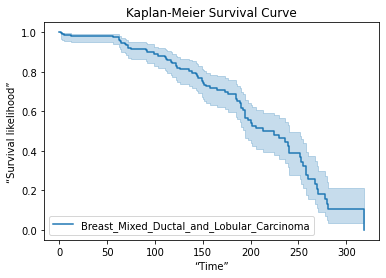

In [26]:
kmp=KaplanMeierFitter()

x=Breast_Mixed_Ductal_and_Lobular_Carcinoma['overall_survival_months']  # Represents duration

y=Breast_Mixed_Ductal_and_Lobular_Carcinoma['overall_survival']
kmp.fit(x, y,label='Breast_Mixed_Ductal_and_Lobular_Carcinoma')
kmp.plot(title='Kaplan-Meier Survival Curve')   #plot the survival curve

plt.xlabel("“Time”")

plt.ylabel("“Survival likelihood”")

plt.show()

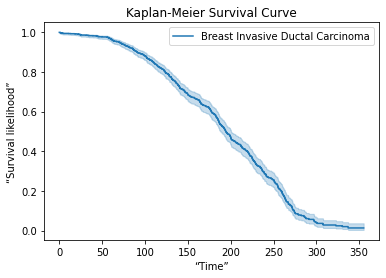

In [27]:
kmp=KaplanMeierFitter()

a=Breast_Invasive_Ductal_Carcinoma['overall_survival_months']  
b=Breast_Invasive_Ductal_Carcinoma['overall_survival'] 
kmp.fit(a, b,label='Breast Invasive Ductal Carcinoma')
kmp.plot(title='Kaplan-Meier Survival Curve')   # plot the survival curve

plt.xlabel("“Time”")

plt.ylabel("“Survival likelihood”")

plt.show()

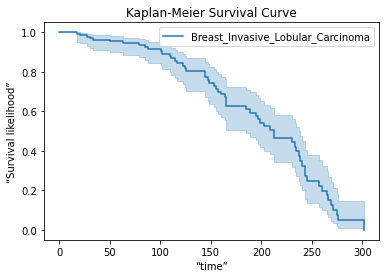

In [28]:
kmp=KaplanMeierFitter()

c=Breast_Invasive_Lobular_Carcinoma['overall_survival_months']  # Represents duration

d=Breast_Invasive_Lobular_Carcinoma['overall_survival'] 
kmp.fit(c, d,label='Breast_Invasive_Lobular_Carcinoma')
kmp.plot(title='Kaplan-Meier Survival Curve')   
plt.xlabel("“time”")

plt.ylabel("“Survival likelihood”")

plt.show()


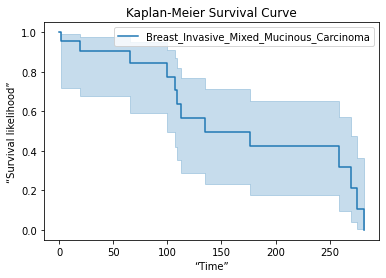

In [29]:
kmp=KaplanMeierFitter()

e=Breast_Invasive_Mixed_Mucinous_Carcinoma['overall_survival_months']  # Represents duration

f=Breast_Invasive_Mixed_Mucinous_Carcinoma['overall_survival'] 

kmp.fit(e, f,label='Breast_Invasive_Mixed_Mucinous_Carcinoma')
kmp.plot(title='Kaplan-Meier Survival Curve')   
plt.xlabel("“Time”")

plt.ylabel("“Survival likelihood”")

plt.show()



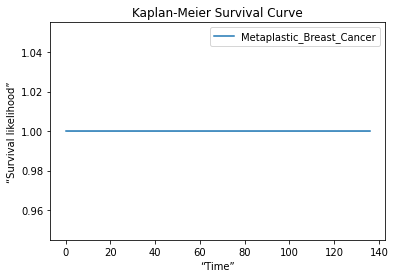

In [30]:
kmp=KaplanMeierFitter()

g=Metaplastic_Breast_Cancer['overall_survival_months']  # Represents duration

h=Metaplastic_Breast_Cancer['overall_survival'] 

kmp.fit(g, h,label='Metaplastic_Breast_Cancer')
ax=kmp.plot(title='Kaplan-Meier Survival Curve') 
plt.xlabel("“Time”")

plt.ylabel("“Survival likelihood”")

plt.show()



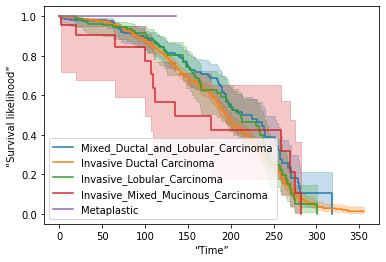

In [51]:
kmp=KaplanMeierFitter()

x=Breast_Mixed_Ductal_and_Lobular_Carcinoma['overall_survival_months'] 

y=Breast_Mixed_Ductal_and_Lobular_Carcinoma['overall_survival']
ax = plt.subplot(111)
kmp.fit(x, y,label='Mixed_Ductal_and_Lobular_Carcinoma')
kmp.plot(ax=ax)   #plot the survival curv



a=Breast_Invasive_Ductal_Carcinoma['overall_survival_months']  
b=Breast_Invasive_Ductal_Carcinoma['overall_survival'] 
kmp.fit(a, b,label='Invasive Ductal Carcinoma')
kmp.plot(ax=ax)   

c=Breast_Invasive_Lobular_Carcinoma['overall_survival_months']

d=Breast_Invasive_Lobular_Carcinoma['overall_survival'] 
kmp.fit(c, d,label='Invasive_Lobular_Carcinoma')
kmp.plot(ax=ax)   


kmp=KaplanMeierFitter()

e=Breast_Invasive_Mixed_Mucinous_Carcinoma['overall_survival_months'] 

f=Breast_Invasive_Mixed_Mucinous_Carcinoma['overall_survival'] 

kmp.fit(e, f,label='Invasive_Mixed_Mucinous_Carcinoma')
kmp.plot(ax=ax)   


kmp=KaplanMeierFitter()

g=Metaplastic_Breast_Cancer['overall_survival_months']  
h=Metaplastic_Breast_Cancer['overall_survival']

kmp.fit(g, h,label='Metaplastic')
kmp.plot(ax=ax)  
plt.xlabel("“Time”")

plt.ylabel("“Survival likelihood”")

plt.title='Kaplan-Meier Survival Curve'
plt.show()

The survival of cancer subtype 'invasive mixed mucinious carcinoma' is most agressive as compared to others there is a sharp decline in probalbility whereas in other subtype the decline is comparatively less and thus show better surviaval.

#3 Irrespective of subtypes  the other clinicalfeatures that determine survival  the best are diagosis age of patient ,type of breast surgery,tumor size and stage, cellularity and type of treatment such as chemoterapy,  hormone therapy and radiotherapy

Survival analysis for chemotherapy

In [31]:
Mdata=Data[['patient_id','chemotherapy','overall_survival_months','overall_survival']]

In [32]:
Mdata

,patient_id,chemotherapy,overall_survival_months,overall_survival
0,0,0,140.500000,1
1,2,0,84.633333,1
2,5,1,163.700000,0
3,6,1,164.933333,1
4,8,1,41.366667,0
...,...,...,...,...
1899,7295,0,196.866667,1
1900,7296,0,44.733333,0
1901,7297,0,175.966667,0
1902,7298,0,86.233333,0


In [37]:
Withchemo=Mdata[Mdata["chemotherapy"] == 1]
Withoutchemo=Mdata[Mdata["chemotherapy"] == 0]

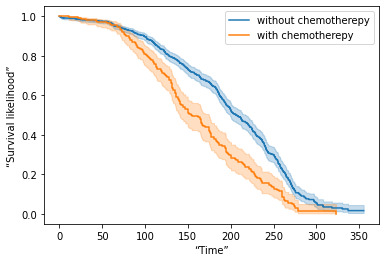

In [38]:
kmp=KaplanMeierFitter()

x=Withoutchemo['overall_survival_months']  # Represents duration

y=Withoutchemo['overall_survival']
ax = plt.subplot(111)
kmp.fit(x, y,label='without chemotherepy')
kmp.plot(ax=ax)   #plot the survival curve


a=Withchemo['overall_survival_months']  
b=Withchemo['overall_survival']
kmp.fit(a, b,label='with chemotherepy')
kmp.plot(ax = ax)

plt.xlabel("“Time”")

plt.ylabel("“Survival likelihood”")

plt.show()

In [41]:
Kdata=Data[['patient_id','tumor_stage','overall_survival_months','overall_survival']]

In [43]:
Kdata

,patient_id,tumor_stage,overall_survival_months,overall_survival
0,0,2.0,140.500000,1
1,2,1.0,84.633333,1
2,5,2.0,163.700000,0
3,6,2.0,164.933333,1
4,8,2.0,41.366667,0
...,...,...,...,...
1899,7295,NaN,196.866667,1
1900,7296,NaN,44.733333,0
1901,7297,NaN,175.966667,0
1902,7298,NaN,86.233333,0


In [44]:
Stage1=Kdata[Kdata["tumor_stage"] == 1]
Stage2=Kdata[Kdata["tumor_stage"] == 2]
Stage3=Kdata[Kdata["tumor_stage"] == 3]

In [46]:
Stage1

,patient_id,tumor_stage,overall_survival_months,overall_survival
1,2,1.0,84.633333,1
11,39,1.0,163.533333,1
18,56,1.0,62.866667,1
20,62,1.0,153.966667,1
21,64,1.0,108.933333,1
...,...,...,...,...
1607,6212,1.0,224.233333,1
1613,6225,1.0,117.866667,1
1616,6229,1.0,0.100000,0
1619,6233,1.0,201.166667,1


Survival analysis for cancer stage

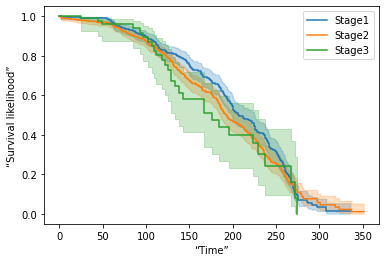

In [49]:
kmp=KaplanMeierFitter()

A=Stage1['overall_survival_months']  # Represents duration

B=Stage1['overall_survival']
ax = plt.subplot(111)
kmp.fit(A, B,label='Stage1')
kmp.plot(ax=ax)   #plot the survival curve
C=Stage2['overall_survival_months']  
D=Stage2['overall_survival']
kmp.fit(C, D,label='Stage2')
kmp.plot(ax = ax)

E=Stage3['overall_survival_months']  
F=Stage3['overall_survival']
kmp.fit(E, F,label='Stage3')
kmp.plot(ax = ax)



plt.xlabel("“Time”")

plt.ylabel("“Survival likelihood”")

plt.show()